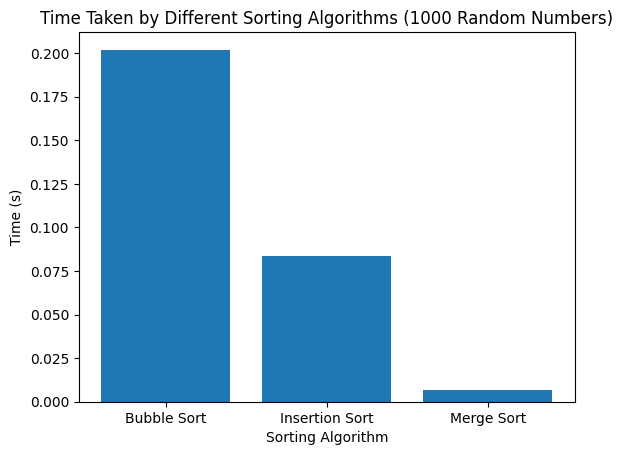

In [1]:
#Q1
import random
import time
import matplotlib.pyplot as plt

# Function to generate a list of random integers
def generate_random_numbers(size):
    return [random.randint(1, 10000) for _ in range(size)]

# Bubble sort algorithm
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

# Insertion sort algorithm
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Merge sort algorithm
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# Function to measure time taken by a sorting algorithm
def measure_sorting_time(sort_func, arr):
    start_time = time.time()
    sort_func(arr)
    end_time = time.time()
    return end_time - start_time

# Generate random numbers
numbers = generate_random_numbers(1000)

# Measure time for each sorting algorithm
bubble_time = measure_sorting_time(bubble_sort, numbers.copy())
insertion_time = measure_sorting_time(insertion_sort, numbers.copy())
merge_time = measure_sorting_time(merge_sort, numbers.copy())

# Plotting the results
labels = ['Bubble Sort', 'Insertion Sort', 'Merge Sort']
times = [bubble_time, insertion_time, merge_time]

plt.bar(labels, times)
plt.xlabel('Sorting Algorithm')
plt.ylabel('Time (s)')
plt.title('Time Taken by Different Sorting Algorithms (1000 Random Numbers)')
plt.show()


In [4]:
#Q2
import heapq

# Function to print 'm' sorted lists in sorted order
def print_sorted_lists(sorted_lists):
    # Initialize an empty min heap
    min_heap = []

    # Push the first element of each list along with the list index into the min heap
    for i, lst in enumerate(sorted_lists):
        if lst:
            heapq.heappush(min_heap, (lst[0], i, 0))

    # While the min heap is not empty
    while min_heap:
        # Pop the smallest element from the heap
        val, lst_idx, idx = heapq.heappop(min_heap)

        # Print the popped value
        print(val, end=" ")

        # Move to the next element in the list from which the popped value came
        idx += 1

        # If there are more elements in the list, push the next element into the heap
        if idx < len(sorted_lists[lst_idx]):
            heapq.heappush(min_heap, (sorted_lists[lst_idx][idx], lst_idx, idx))

sorted_lists = [
    [10,20,30,40],
    [15,25,35],
    [27,29,37,48,93],
    [32,33]
]

print("Sorted lists in sorted order:")
print_sorted_lists(sorted_lists)


Sorted lists in sorted order:
10 15 20 25 27 29 30 32 33 35 37 40 48 93 

In [5]:
#Q3
def find_k_largest_elements(nums, k):
    if not nums or k <= 0:
        return []

    # Sort the array in descending order
    nums.sort(reverse=True)

    # Return the first K elements
    return nums[:k]

nums = [3,6,7,5,2,1]
k = 3
result = find_k_largest_elements(nums, k)
print(f"The {k} largest elements in the array are:", result)


The 3 largest elements in the array are: [7, 6, 5]


In [6]:
#Q4
def max_activities(activities):
    # Sort activities based on their finish times
    sorted_activities = sorted(activities, key=lambda x: x[1])

    # Initialize variables
    prev_finish_time = float('-inf')
    max_activities_count = 0
    selected_activities = []

    # Iterate through sorted activities
    for activity in sorted_activities:
        start_time, finish_time = activity
        # If the current activity can be performed without overlapping with previous activity
        if start_time >= prev_finish_time:
            max_activities_count += 1
            prev_finish_time = finish_time
            selected_activities.append(activity)

    return max_activities_count, selected_activities

activities = [(1, 4), (3, 5), (0, 6), (5, 7), (3,8), (5, 9),(6,10),(8,11),(8,12),(2,13),(12,14)]
max_count, selected_activities = max_activities(activities)
print("Maximum number of activities:", max_count)
print("Activities performed:", selected_activities)


Maximum number of activities: 4
Activities performed: [(1, 4), (5, 7), (8, 11), (12, 14)]


In [7]:
#Q5
def merge_intervals(intervals):
    if not intervals:
        return []

    # Sort intervals based on start times
    sorted_intervals = sorted(intervals, key=lambda x: x[0])

    merged_intervals = [sorted_intervals[0]]

    for interval in sorted_intervals[1:]:
        prev_start, prev_end = merged_intervals[-1]
        start, end = interval

        # If the current interval overlaps with the previous merged interval, merge them
        if start <= prev_end:
            merged_intervals[-1] = (prev_start, max(prev_end, end))
        else:
            merged_intervals.append(interval)

    return merged_intervals

intervals = [(1, 4), (2, 5), (7, 8), (6, 9)]
merged_intervals = merge_intervals(intervals)
print("Non-overlapping intervals after merging:")
print(merged_intervals)


Non-overlapping intervals after merging:
[(1, 5), (6, 9)]
